# Local authority value added measure

In [166]:
path = 'data/df_weight_reduced_local_authorities.csv'
import pandas as pd
df = pd.read_csv(path)

In [167]:
df.head(3)

,Unnamed: 0,code,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1,E06000047,County Durham,County or Unitary Authority,Gross value added per hour worked,"Boosting productivity, pay, jobs and living st...",2020,Pounds,£,30.50,-0.614333
1,2,E06000005,Darlington,County or Unitary Authority,Gross value added per hour worked,"Boosting productivity, pay, jobs and living st...",2020,Pounds,£,31.87,-0.364590
2,3,E06000001,Hartlepool,County or Unitary Authority,Gross value added per hour worked,"Boosting productivity, pay, jobs and living st...",2020,Pounds,£,31.85,-0.368235


In [168]:
cols_Reduced = ['code','Unnamed: 1', 'Unnamed: 3', 'Unnamed: 8']
df_reduced = df[cols_Reduced]
df_reduced.head(2)

,code,Unnamed: 1,Unnamed: 3,Unnamed: 8
0,E06000047,County Durham,Gross value added per hour worked,30.50
1,E06000005,Darlington,Gross value added per hour worked,31.87


In [169]:
Y_value = 'Gross median weekly pay'

df_Y = df_reduced[df_reduced['Unnamed: 3']==Y_value]
print(len(df_Y))
df_Y.head(2)

357


,code,Unnamed: 1,Unnamed: 3,Unnamed: 8
346,E06000047,County Durham,Gross median weekly pay,489.2
347,E06000005,Darlington,Gross median weekly pay,482.2


In [170]:
#tranpose version ready to feature engineer
df_Y_T = df_Y.set_index(['code','Unnamed: 1','Unnamed: 3']).unstack()

df_Y_T.head(2)

,,Unnamed: 8
,Unnamed: 3,Gross median weekly pay
code,Unnamed: 1,
E06000001,Hartlepool,498.3
E06000002,Middlesbrough,454.5


In [171]:
df_X = df_reduced[df_reduced['Unnamed: 3']!=Y_value]
print(len(df_X))
df_X.head(2)

9838


,code,Unnamed: 1,Unnamed: 3,Unnamed: 8
0,E06000047,County Durham,Gross value added per hour worked,30.50
1,E06000005,Darlington,Gross value added per hour worked,31.87


In [172]:
df_X_T = df_X.set_index(['code','Unnamed: 1','Unnamed: 3']).unstack()

df_X_T.head(2)

Unnamed: 8                                  
Unnamed: 3              4G coverage Additions to the housing stock   
code      Unnamed: 1                                                 
E06000001 Hartlepool          99.97                            8.0  \
E06000002 Middlesbrough      100.00                            9.0   

                                                                              
Unnamed: 3              Aged 16 to 64 years level 3 or above qualifications   
code      Unnamed: 1                                                          
E06000001 Hartlepool                                                  56.4   \
E06000002 Middlesbrough                                               48.7    

                                                                                                   
Unnamed: 3              Aged 19 years and over further education and skills learner achievements   
code      Unnamed: 1                                                                               
E06000001 Hartlepool                                                2910.0                        \
E06000002 Middlesbrough                                             4690.0                         

                                                                                            
Unnamed: 3              Aged 19 years and over further education and skills participation   
code      Unnamed: 1                                                                        
E06000001 Hartlepool                                                8888.0                 \
E06000002 Middlesbrough                                             9470.0                  

                                                               
Unnamed: 3              Anxiety Apprenticeships achievements   
code      Unnamed: 1                                           
E06000001 Hartlepool       3.30                        456.0  \
E06000002 Middlesbrough    3.02                        446.0   

                                                 
Unnamed: 3              Apprenticeships starts   
code      Unnamed: 1                             
E06000001 Hartlepool                    1280.0  \
E06000002 Middlesbrough                 1136.0   

                                                            
Unnamed: 3              Cancer diagnosis at stage 1 and 2   
code      Unnamed: 1                                        
E06000001 Hartlepool                             48.21853  \
E06000002 Middlesbrough                          55.17891   

                                                                                                   
Unnamed: 3              Cardiovascular mortality considered preventable in persons aged under 75   
code      Unnamed: 1                                                                               
E06000001 Hartlepool                                             40.050966                        \
E06000002 Middlesbrough                                          42.261244                         

                         ...                                
Unnamed: 3               ... Male healthy life expectancy   
code      Unnamed: 1     ...                                
E06000001 Hartlepool     ...                        57.58  \
E06000002 Middlesbrough  ...                        58.83   

                                                                     
Unnamed: 3              Overweight adults (aged 18 years and over)   
code      Unnamed: 1                                                 
E06000001 Hartlepool                                     74.576608  \
E06000002 Middlesbrough                                  70.764041   

                                                                                  
Unnamed: 3              Overweight children at Year 6 age (aged 10 to 11 years)   
code      Unnamed: 1                                                              
E06000001 Hartlepool      

 ### Need to try merging the two data set

In [173]:
combined_T = df_Y_T.merge(df_X_T, left_index = True, right_index = True, how = 'inner')

combined_T.head(2)

Unnamed: 8               
Unnamed: 3              Gross median weekly pay 4G coverage   
code      Unnamed: 1                                          
E06000001 Hartlepool                      498.3       99.97  \
E06000002 Middlesbrough                   454.5      100.00   

                                                         
Unnamed: 3              Additions to the housing stock   
code      Unnamed: 1                                     
E06000001 Hartlepool                               8.0  \
E06000002 Middlesbrough                            9.0   

                                                                              
Unnamed: 3              Aged 16 to 64 years level 3 or above qualifications   
code      Unnamed: 1                                                          
E06000001 Hartlepool                                                  56.4   \
E06000002 Middlesbrough                                               48.7    

                                                                                                   
Unnamed: 3              Aged 19 years and over further education and skills learner achievements   
code      Unnamed: 1                                                                               
E06000001 Hartlepool                                                2910.0                        \
E06000002 Middlesbrough                                             4690.0                         

                                                                                            
Unnamed: 3              Aged 19 years and over further education and skills participation   
code      Unnamed: 1                                                                        
E06000001 Hartlepool                                                8888.0                 \
E06000002 Middlesbrough                                             9470.0                  

                                                               
Unnamed: 3              Anxiety Apprenticeships achievements   
code      Unnamed: 1                                           
E06000001 Hartlepool       3.30                        456.0  \
E06000002 Middlesbrough    3.02                        446.0   

                                                 
Unnamed: 3              Apprenticeships starts   
code      Unnamed: 1                             
E06000001 Hartlepool                    1280.0  \
E06000002 Middlesbrough                 1136.0   

                                                           ...   
Unnamed: 3              Cancer diagnosis at stage 1 and 2  ...   
code      Unnamed: 1                                       ...   
E06000001 Hartlepool                             48.21853  ...  \
E06000002 Middlesbrough                          55.17891  ...   

                                                       
Unnamed: 3              Male healthy life expectancy   
code      Unnamed: 1                                   
E06000001 Hartlepool                           57.58  \
E06000002 Middlesbrough                        58.83   

                                                                     
Unnamed: 3              Overweight adults (aged 18 years and over)   
code      Unnamed: 1                                                 
E06000001 Hartlepool                                     74.576608  \
E06000002 Middlesbrough                                  70.764041   

                                                                                  
Unnamed: 3              Overweight children at Year 6 age (aged 10 to 11 years)   
code      Unnamed: 1                                                              
E06000001 Hartlepool                                              43.18182       \
E06000002 Middlesbrough                                           44.89796        

                                                                                         
Unnamed: 3              Ov

In [174]:
# fill na values with mean
combined_T_filled = combined_T.fillna(combined_T.mean())

combined_T_filled.head(2)

Unnamed: 8               
Unnamed: 3              Gross median weekly pay 4G coverage   
code      Unnamed: 1                                          
E06000001 Hartlepool                      498.3       99.97  \
E06000002 Middlesbrough                   454.5      100.00   

                                                         
Unnamed: 3              Additions to the housing stock   
code      Unnamed: 1                                     
E06000001 Hartlepool                               8.0  \
E06000002 Middlesbrough                            9.0   

                                                                              
Unnamed: 3              Aged 16 to 64 years level 3 or above qualifications   
code      Unnamed: 1                                                          
E06000001 Hartlepool                                                  56.4   \
E06000002 Middlesbrough                                               48.7    

                                                                                                   
Unnamed: 3              Aged 19 years and over further education and skills learner achievements   
code      Unnamed: 1                                                                               
E06000001 Hartlepool                                                2910.0                        \
E06000002 Middlesbrough                                             4690.0                         

                                                                                            
Unnamed: 3              Aged 19 years and over further education and skills participation   
code      Unnamed: 1                                                                        
E06000001 Hartlepool                                                8888.0                 \
E06000002 Middlesbrough                                             9470.0                  

                                                               
Unnamed: 3              Anxiety Apprenticeships achievements   
code      Unnamed: 1                                           
E06000001 Hartlepool       3.30                        456.0  \
E06000002 Middlesbrough    3.02                        446.0   

                                                 
Unnamed: 3              Apprenticeships starts   
code      Unnamed: 1                             
E06000001 Hartlepool                    1280.0  \
E06000002 Middlesbrough                 1136.0   

                                                           ...   
Unnamed: 3              Cancer diagnosis at stage 1 and 2  ...   
code      Unnamed: 1                                       ...   
E06000001 Hartlepool                             48.21853  ...  \
E06000002 Middlesbrough                          55.17891  ...   

                                                       
Unnamed: 3              Male healthy life expectancy   
code      Unnamed: 1                                   
E06000001 Hartlepool                           57.58  \
E06000002 Middlesbrough                        58.83   

                                                                     
Unnamed: 3              Overweight adults (aged 18 years and over)   
code      Unnamed: 1                                                 
E06000001 Hartlepool                                     74.576608  \
E06000002 Middlesbrough                                  70.764041   

                                                                                  
Unnamed: 3              Overweight children at Year 6 age (aged 10 to 11 years)   
code      Unnamed: 1                                                              
E06000001 Hartlepool                                              43.18182       \
E06000002 Middlesbrough                                           44.89796        

                                                                                         
Unnamed: 3              Ov

In [175]:
combined_T_filled.to_csv('data/combined_T_filled.csv')

In [176]:
print(combined_T_filled.iloc[:,0].max())
print(combined_T_filled.iloc[:,0].min())



833.1
394.4


 # Now apply sk learn
 first scale
 then look at which features predict the target
 

In [177]:
import sklearn
from sklearn.model_selection import train_test_split

In [178]:
#split data first before anything
X = combined_T_filled.iloc[:,1:].values.tolist()
y = combined_T_filled.iloc[:,0].values.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer
from sklearn.pipeline import Pipeline
# create a pipeline 
scaler = MinMaxScaler()
trans = QuantileTransformer(n_quantiles=100, output_distribution ='normal') # regularise + reduce impact of outliers
model = LinearRegression()

pipe = Pipeline(steps = [('scaler', scaler), ('transformation',trans), ('model', model)])


In [180]:
model = pipe.fit(X_train,y_train)

print('train:',model.score(X_train,y_train))
print('test:',model.score(X_test,y_test))

train: 0.6940772611208752
test: 0.6744319613426735


 # Try coefficient values

In [181]:
#extract column names
names_multi = combined_T_filled.columns[1:]
names = []
for I in range(len(names_multi)):
    names.append(names_multi[I][1])
names[0:2]

['4G coverage', 'Additions to the housing stock']

In [182]:
#extract coefficients
coeff = model['model'].coef_

In [183]:
dict_c = {'col' :names, 'coeff_mod': abs(coeff), 'coeff': coeff}

df_c = pd.DataFrame(dict_c).sort_values('coeff_mod',ascending=False)
df_c

,col,coeff_mod,coeff
21,Gross disposable household income per head,27.267956,27.267956
6,Apprenticeships achievements,20.251317,-20.251317
32,Public transport or walk to employment centre ...,13.956809,13.956809
14,Cycle to employment centre with 500 to 4999 jobs,12.520942,-12.520942
7,Apprenticeships starts,11.872693,11.872693
15,Drive to employment centre with 500 to 4999 jobs,9.248851,-9.248851
4,Aged 19 years and over further education and s...,8.445833,-8.445833
11,Children at expected level for literacy by end...,7.858751,7.858751
27,Overweight children at Year 6 age (aged 10 to ...,7.532630,7.532630
22,Gross value added per hour worked,6.223410,6.223410


# Clustering

### PCA visulations
https://plotly.com/python/pca-visualization/

In [184]:
import numpy as np

In [185]:

X_scaled = scaler.transform(X)
X_scaled_trans = trans.transform(X_scaled)


In [200]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA


df = pd.DataFrame(X_scaled_trans, columns=names)

df_y = pd.DataFrame({Y_value: y})
df.head(1)

,4G coverage,Additions to the housing stock,Aged 16 to 64 years level 3 or above qualifications,Aged 19 years and over further education and skills learner achievements,Aged 19 years and over further education and skills participation,Anxiety,Apprenticeships achievements,Apprenticeships starts,Cancer diagnosis at stage 1 and 2,Cardiovascular mortality considered preventable in persons aged under 75,...,Male healthy life expectancy,Overweight adults (aged 18 years and over),Overweight children at Year 6 age (aged 10 to 11 years),Overweight children at reception age (aged four to five years),Persistent absences for all pupils,Persistent absences for pupils eligible for free school meals,Persistent absences for pupils looked after by local authorities,Public transport or walk to employment centre with 500 to 4999 jobs,Pupils at expected standards by end of primary school,Schools and nursery schools rated good or outstanding
0,-0.13971,-0.348756,-0.430727,-1.363278,2.225229,0.666564,0.89256,1.527278,-1.332625,1.640063,...,-1.48403,2.419007,1.588922,2.363487,2.148238,1.075292,0.996511,0.690631,1.304923,0.91613


In [201]:
# create basic clusters
from sklearn.cluster import KMeans
N_clusters = 3

kmeans = KMeans(n_clusters=N_clusters, random_state=0)

Clustering = kmeans.fit(df)

C:\Users\AT030915\Hackathon_05_23\venv\venv_hack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [202]:
labels = Clustering.labels_
#add to df
df_labels = df
df_labels['labels'] = labels
df_labels.head(1)

,4G coverage,Additions to the housing stock,Aged 16 to 64 years level 3 or above qualifications,Aged 19 years and over further education and skills learner achievements,Aged 19 years and over further education and skills participation,Anxiety,Apprenticeships achievements,Apprenticeships starts,Cancer diagnosis at stage 1 and 2,Cardiovascular mortality considered preventable in persons aged under 75,...,Overweight adults (aged 18 years and over),Overweight children at Year 6 age (aged 10 to 11 years),Overweight children at reception age (aged four to five years),Persistent absences for all pupils,Persistent absences for pupils eligible for free school meals,Persistent absences for pupils looked after by local authorities,Public transport or walk to employment centre with 500 to 4999 jobs,Pupils at expected standards by end of primary school,Schools and nursery schools rated good or outstanding,labels
0,-0.13971,-0.348756,-0.430727,-1.363278,2.225229,0.666564,0.89256,1.527278,-1.332625,1.640063,...,2.419007,1.588922,2.363487,2.148238,1.075292,0.996511,0.690631,1.304923,0.91613,2


# PCA plot - of the 3 classes generated by k means

In [203]:
import matplotlib.pyplot as plt 
pca = PCA(n_components=2) #2-dimensional PCA
df_pca = pca.fit_transform(df)

np.shape(df_pca)

(357, 2)

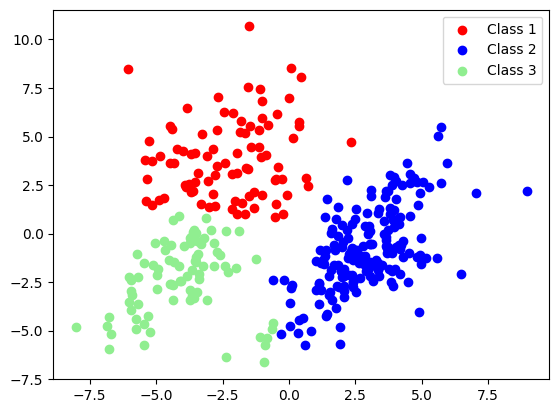

In [204]:


plt.scatter(df_pca[df['labels']==0][:,0], df_pca[df['labels']==0][:,1], label='Class 1', c='red')
plt.scatter(df_pca[df['labels']==1][:,0], df_pca[df['labels']==1][:,1], label='Class 2', c='blue')
plt.scatter(df_pca[df['labels']==2][:,0], df_pca[df['labels']==2][:,1], label='Class 3', c='lightgreen')
# plt.scatter(df_pca[df['labels']==1], df[y==2][1], label='Class 2', c='blue')
# plt.scatter(df_pca[df['labels']==2], df[y==3][1], label='Class 3', c='lightgreen')

plt.legend()
plt.show()

# Class split based on the value of the value of y  

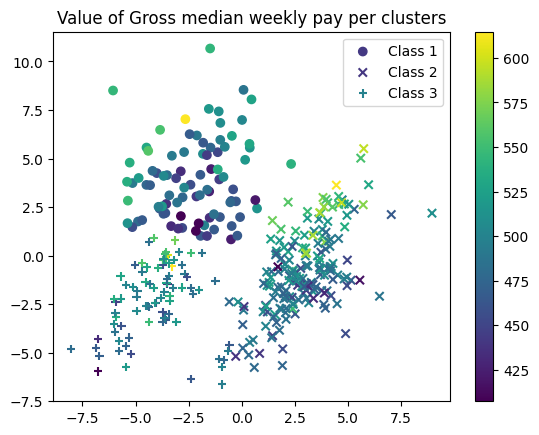

In [208]:


plt.scatter(df_pca[df['labels']==0][:,0],df_pca[df['labels']==0][:,1], c= df_y[df['labels']==0].values,marker='o',label='Class 1')
plt.scatter(df_pca[df['labels']==1][:,0],df_pca[df['labels']==1][:,1], c= df_y[df['labels']==1].values,marker='x',label='Class 2')
plt.scatter(df_pca[df['labels']==2][:,0],df_pca[df['labels']==2][:,1], c= df_y[df['labels']==2].values,marker='+',label='Class 3')

# plt.scatter(df_pca[df['labels']==1][:,0], df_y[df['labels']==1], label='Class 2', c='blue')
# plt.scatter(df_pca[df['labels']==2][:,0], df_y[df['labels']==2], label='Class 3', c='lightgreen')
# plt.scatter(df_pca[df['labels']==1], df[y==2][1], label='Class 2', c='blue')
# plt.scatter(df_pca[df['labels']==2], df[y==3][1], label='Class 3', c='lightgreen')

plt.legend()
plt.colorbar()
plt.title(f'Value of {Y_value} per clusters')
plt.show()

# Labelling each regioncombined_T_filled

In [198]:
combined_T_filled_label  = combined_T_filled.iloc[:,0:1]
combined_T_filled_label['label'] = labels

df_final = pd.DataFrame(combined_T_filled_label[combined_T_filled_label.columns[-1]])

df_final


C:\Users\AT030915\AppData\Local\Temp\ipykernel_10452\419351420.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,,label
,,
code,Unnamed: 1,
E06000001,Hartlepool,1
E06000002,Middlesbrough,2
E06000003,Redcar and Cleveland,1
E06000004,Stockton-on-Tees,0
E06000005,Darlington,0
...,...,...
W06000020,Torfaen,0
W06000021,Monmouthshire,0


In [209]:
df_final.to_csv('data/df_final_clusters.csv')

In [108]:

n_components = 4

pca = PCA(n_components=n_components)
components = pca.fit_transform(df)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = Y_value

fig = px.scatter_matrix(
    components,
    color=y,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_train))

In [54]:
pca_val = pca.fit(X_train)

In [57]:
dir(pca_val)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_n_features_out',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_feature_names_out',
 'get_params',
 'get_precision',
 'inverse_trans